In [59]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [60]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6229 non-null   object 
 1   [Australian dollar ]      6229 non-null   object 
 2   [Bulgarian lev ]          5827 non-null   object 
 3   [Brazilian real ]         5961 non-null   object 
 4   [Canadian dollar ]        6229 non-null   object 
 5   [Swiss franc ]            6229 non-null   object 
 6   [Chinese yuan renminbi ]  5961 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6229 non-null   object 
 9   [Danish krone ]           6229 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6229 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6229 non-null   object 
 14  [Croatia

In [61]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [62]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]

In [63]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.3818     1
1.3591     1
1.3405     1
1.3580     1
1.0865     1
Name: US_dollar, Length: 3718, dtype: int64

In [64]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [104]:
euro_to_dollar['Time']

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
6224   2023-01-23
6225   2023-01-24
6226   2023-01-25
6227   2023-01-26
6228   2023-01-27
Name: Time, Length: 6167, dtype: datetime64[ns]

In [66]:
euro_to_dollar['US_dollar'].astype(float)

0       1.1789
1       1.1790
2       1.1743
3       1.1632
4       1.1659
         ...  
6224    1.0871
6225    1.0858
6226    1.0878
6227    1.0895
6228    1.0865
Name: US_dollar, Length: 6167, dtype: float64

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

In [68]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

For this graph I want to tell a story about how the value of the dollar changes in regards to the 2008 financial crisis and compare that to how it changed during the Covid-19 crisis. To do this, we will highlight the value during 2007-2008, 2020, and an interim period to find a 'normal' value. 

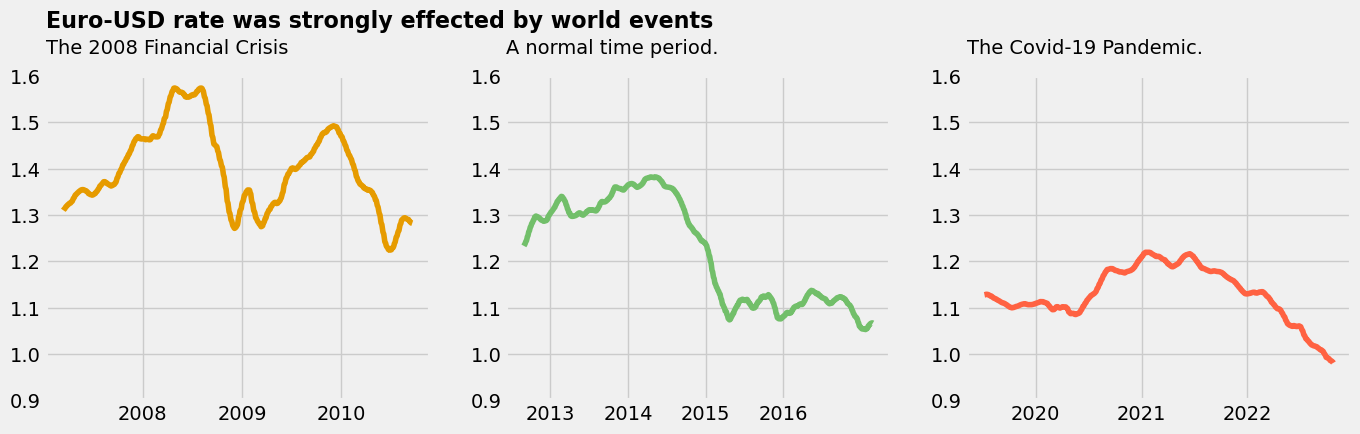

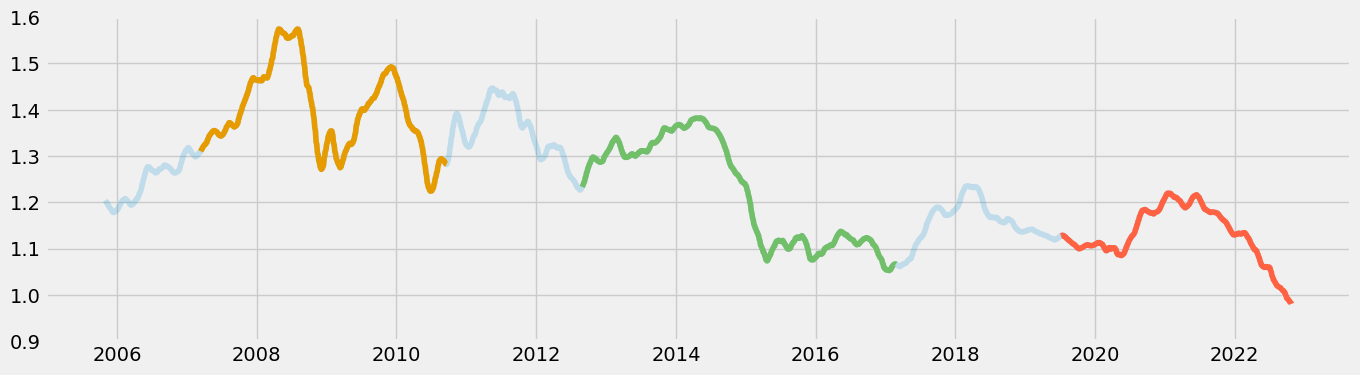

In [154]:
style.use('fivethirtyeight')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols = 3, figsize = (15,4))
ax1.plot(euro_to_dollar['Time'][2100:3000], euro_to_dollar['rolling_mean'][2100:3000], color = '#e69b00')
#for location in ['left', 'right', 'bottom', 'top']:
#   ax1.spines[location].set_visible(True)
    
ax1.text(x=0,y=1.15, s='Euro-USD rate was strongly effected by world events', weight='bold', size=16, ha='left', transform=ax1.transAxes)
ax1.text(0,1.07,'The 2008 Financial Crisis', ha='left', transform=ax1.transAxes)
ax1.set_ylim([0.9, 1.6])
ax1.set_xticks(['2008-01-01', '2009-01-01', '2010-01-01'])
ax1.set_xticklabels(['2008','2009','2010'])

ax2.plot(euro_to_dollar['Time'][3500:4650], euro_to_dollar['rolling_mean'][3500:4650], color = '#72bf6a')
#ax2.text(x=1.2,y=1.1, s='A normal time period', weight='bold', size=16, ha='left', transform=ax1.transAxes)
ax2.text(1.2,1.07,'A normal time period.', ha='left', transform=ax1.transAxes)
ax2.set_ylim([0.9, 1.6])
ax2.set_xticks(['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01'])
ax2.set_xticklabels(['2013','2014','2015', '2016'])

ax3.plot(euro_to_dollar['Time'][5250:6100], euro_to_dollar['rolling_mean'][5250:6100], color = '#ff6242')
#ax3.text(x=2.4,y=1.1, s='Covid-19 Pandemic', weight='bold', size=16, ha='left', transform=ax1.transAxes)
ax3.text(2.4,1.07,'The Covid-19 Pandemic.', ha='left', transform=ax1.transAxes)
ax3.set_ylim([0.9, 1.6])
ax3.set_xticks(['2020-01-01', '2021-01-01', '2022-01-01'])
ax3.set_xticklabels(['2020','2021','2022'])

plt.show()

fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (15,4))
ax.plot(euro_to_dollar['Time'][1750:6000], euro_to_dollar['rolling_mean'][1750:6000], alpha = 0.2)
ax.plot(euro_to_dollar['Time'][5250:6100], euro_to_dollar['rolling_mean'][5250:6100], color = '#ff6242')
ax.plot(euro_to_dollar['Time'][3500:4650], euro_to_dollar['rolling_mean'][3500:4650], color = '#72bf6a')
ax.plot(euro_to_dollar['Time'][2100:3000], euro_to_dollar['rolling_mean'][2100:3000], color = '#e69b00')
ax.set_ylim([0.9, 1.6])

plt.show()

Next steps include the following:

1. Creating a graph for a different currency.
2. Creating a graph for multiple currencies — perhaps you can compare their evolution.
3. Making your project portfolio-ready by following this style guide.